<a href="https://colab.research.google.com/github/mahdifarhang/AI_CA5/blob/master/AI_CA5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **گزارش کار تمرین کامپیوتری پنجم درس هوش مصنوعی**

# سوال اول

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


1. Define a Convolution Neural Network

here we define our neural network


In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 10)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.fc1(x)
        return x


net = Net()

## با وزن های تصادفی 

In [0]:
torch.nn.init.xavier_uniform_(net.conv1.weight)
torch.nn.init.xavier_uniform_(net.conv2.weight)
torch.nn.init.xavier_uniform_(net.fc1.weight)

Parameter containing:
tensor([[-0.1035,  0.1174,  0.0942,  ..., -0.1038, -0.0324,  0.0116],
        [-0.0154,  0.0285, -0.0126,  ...,  0.0056,  0.0538,  0.0255],
        [ 0.1059, -0.1133,  0.0189,  ..., -0.1028,  0.0050,  0.0533],
        ...,
        [-0.1060, -0.0621, -0.1131,  ...,  0.0804, -0.0519,  0.0149],
        [ 0.0232,  0.1187, -0.0443,  ...,  0.0157,  0.0144,  0.0457],
        [-0.0270, -0.1112,  0.0625,  ...,  0.0074,  0.1119, -0.1076]],
       requires_grad=True)

2. Define a Loss function and optimizer



Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

3. Train the network

We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [0]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 500 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0

print('Finished Training')

[1,   500] loss: 1.589
[1,  1000] loss: 1.572
[1,  1500] loss: 1.546
[2,   500] loss: 1.514
[2,  1000] loss: 1.492
[2,  1500] loss: 1.472
[3,   500] loss: 1.438
[3,  1000] loss: 1.432
[3,  1500] loss: 1.409
[4,   500] loss: 1.379
[4,  1000] loss: 1.394
[4,  1500] loss: 1.366
[5,   500] loss: 1.350
[5,  1000] loss: 1.346
[5,  1500] loss: 1.334
Finished Training


4. Test the network on the test data


We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.



In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 52 %


به دست آمد که دقت داده های تست ما بر روی ۱۰۰۰ داده برابر 52 درصد است. 

## با وزن های صفر:

In [0]:
torch.nn.init.zeros_(net.conv1.bias)
torch.nn.init.zeros_(net.conv1.weight)
torch.nn.init.zeros_(net.conv2.bias)
torch.nn.init.zeros_(net.conv2.weight)
torch.nn.init.zeros_(net.fc1.bias)
torch.nn.init.zeros_(net.fc1.weight)

Parameter containing:
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], requires_grad=True)

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 500 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0

print('Finished Training')

[1,   500] loss: 2.303
[1,  1000] loss: 2.303
[1,  1500] loss: 2.303
[2,   500] loss: 2.303
[2,  1000] loss: 2.303
[2,  1500] loss: 2.303
[3,   500] loss: 2.303
[3,  1000] loss: 2.303
[3,  1500] loss: 2.303
[4,   500] loss: 2.303
[4,  1000] loss: 2.303
[4,  1500] loss: 2.303
[5,   500] loss: 2.303
[5,  1000] loss: 2.303
[5,  1500] loss: 2.303
Finished Training


همانطور که مشاهده میشود، خطا طی تمرین های متوالی و بیشتر کم نمیشود. که البته این مسئله طبیعی به نظر میرسد و ما این را پیشبینی میکردیم.
علت این است که چون ضرایب صفر است، تمرین های قبلی تاثیری را به وجود نمی آورد.

In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 10 %


این بار دقت ما به ۱۰ درصد کاهش پیدا کرد.و این عدد نیز قابل پیشبینی بود. یعنی کاملا رندوم تشخیص داده است.(چون ۱۰نوع خروجی داریم) و این مسئله طبیعی است چون آموزش (همانطور که دیده شد) انجام نمیشود.

بدیهی است که وزن های رندوم نتیجه ی بهتری به ما میدهد

# سوال دوم

یک convolution layar از  network خود کم میکنیم

## Conv2d(3, 8, 5)

In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(8 * 14 * 14, 10)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
#         print(x.size())
        x = x.view(-1, 8 * 14 * 14)
        x = self.fc1(x)
        return x


net = Net()

برای پیدا کردن عدد ۱۴ که در کد نوشته شده، بعد از کانوالو در تابع فوروارد، مقدار اندازه ایکس را چاپ میکنیم
یک آرایه ی چهار تایی میگیریم که سه عدد نهایی آن همان عددی است که باید به ورودی تابع خطی داده شود.



In [0]:
torch.nn.init.xavier_uniform_(net.conv1.weight)
torch.nn.init.xavier_uniform_(net.fc1.weight)

Parameter containing:
tensor([[ 0.0149,  0.0327,  0.0576,  ...,  0.0049,  0.0163, -0.0131],
        [-0.0466,  0.0394, -0.0262,  ...,  0.0403, -0.0639, -0.0224],
        [-0.0399, -0.0035,  0.0675,  ...,  0.0345, -0.0606,  0.0317],
        ...,
        [ 0.0061, -0.0708,  0.0649,  ...,  0.0484, -0.0608, -0.0127],
        [-0.0458,  0.0252,  0.0254,  ...,  0.0465, -0.0679, -0.0312],
        [ 0.0117,  0.0260,  0.0681,  ...,  0.0178,  0.0545,  0.0615]],
       requires_grad=True)

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 500 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0

print('Finished Training')

[1,   500] loss: 2.133
[1,  1000] loss: 1.920
[1,  1500] loss: 1.837
[2,   500] loss: 1.762
[2,  1000] loss: 1.689
[2,  1500] loss: 1.682
[3,   500] loss: 1.637
[3,  1000] loss: 1.627
[3,  1500] loss: 1.603
[4,   500] loss: 1.587
[4,  1000] loss: 1.569
[4,  1500] loss: 1.575
[5,   500] loss: 1.545
[5,  1000] loss: 1.547
[5,  1500] loss: 1.533
Finished Training


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 49 %


همانطور که انتظار میرفت، دقت داده های ما از ۵۲ به 49 کاهش پیدا کرد. این کاهش طبیعی است زیرا یک لایه از لایه های شبکه عصبی ما کم شده است و دقت خروجی ما طبیعتا کاهش پیدا میکند.


## Conv2d(3, 6, 5)

In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(6 * 14 * 14, 10)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
#         print(x.size())
        x = x.view(-1, 6 * 14 * 14)
        x = self.fc1(x)
        return x


net = Net()

برای پیدا کردن عدد ۱۴ که در کد نوشته شده، بعد از کانوالو در تابع فوروارد، مقدار اندازه ایکس را چاپ میکنیم
یک آرایه ی چهار تایی میگیریم که سه عدد نهایی آن همان عددی است که باید به ورودی تابع خطی داده شود.



In [0]:
torch.nn.init.xavier_uniform_(net.conv1.weight)
torch.nn.init.xavier_uniform_(net.fc1.weight)

Parameter containing:
tensor([[ 0.0149,  0.0327,  0.0576,  ...,  0.0049,  0.0163, -0.0131],
        [-0.0466,  0.0394, -0.0262,  ...,  0.0403, -0.0639, -0.0224],
        [-0.0399, -0.0035,  0.0675,  ...,  0.0345, -0.0606,  0.0317],
        ...,
        [ 0.0061, -0.0708,  0.0649,  ...,  0.0484, -0.0608, -0.0127],
        [-0.0458,  0.0252,  0.0254,  ...,  0.0465, -0.0679, -0.0312],
        [ 0.0117,  0.0260,  0.0681,  ...,  0.0178,  0.0545,  0.0615]],
       requires_grad=True)

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 500 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0

print('Finished Training')

[1,   500] loss: 2.133
[1,  1000] loss: 1.920
[1,  1500] loss: 1.837
[2,   500] loss: 1.762
[2,  1000] loss: 1.689
[2,  1500] loss: 1.682
[3,   500] loss: 1.637
[3,  1000] loss: 1.627
[3,  1500] loss: 1.603
[4,   500] loss: 1.587
[4,  1000] loss: 1.569
[4,  1500] loss: 1.575
[5,   500] loss: 1.545
[5,  1000] loss: 1.547
[5,  1500] loss: 1.533
Finished Training


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 46 %


همانطور که انتظار میرفت، دقت داده های ما از ۵۲ به 46 کاهش پیدا کرد. این کاهش طبیعی است زیرا یک لایه از لایه های شبکه عصبی ما کم شده است و دقت خروجی ما طبیعتا کاهش پیدا میکند.


در دو حالت مختلفی که سوال دو را حل کردیم، دقت ما ۴۹ و ۴۶ درصد بود. نتیجه میگیریم که تعداد لایه هایی که از کانولوشن خروجی میگیریم اگر از ۶ به ۸ تغییر پیدا کند، دقت از ۴۶ به ۴۹ ارتقا پیدا میکند.

# سوال سوم

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


در بالا در خط سوم داده ها را نرمالایز میکنیم

In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 10)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.fc1(x)
        return x


net = Net()

In [0]:
torch.nn.init.xavier_uniform_(net.conv1.weight)
torch.nn.init.xavier_uniform_(net.conv2.weight)
torch.nn.init.xavier_uniform_(net.fc1.weight)

Parameter containing:
tensor([[-0.0167,  0.0850,  0.0664,  ...,  0.1204, -0.0475, -0.1047],
        [-0.0271,  0.1160, -0.1066,  ...,  0.0061,  0.0729, -0.0980],
        [ 0.0537, -0.0613,  0.0829,  ..., -0.0144,  0.0497,  0.0131],
        ...,
        [-0.1171,  0.0554, -0.0911,  ..., -0.0267,  0.0892, -0.0805],
        [-0.0376, -0.0833,  0.0991,  ...,  0.0561, -0.0865,  0.0752],
        [-0.0505,  0.1084,  0.0548,  ..., -0.0945, -0.0487,  0.0605]],
       requires_grad=True)

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 500 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0

print('Finished Training')

[1,   500] loss: 2.116
[1,  1000] loss: 1.795
[1,  1500] loss: 1.669
[2,   500] loss: 1.591
[2,  1000] loss: 1.531
[2,  1500] loss: 1.503
[3,   500] loss: 1.450
[3,  1000] loss: 1.443
[3,  1500] loss: 1.403
[4,   500] loss: 1.372
[4,  1000] loss: 1.358
[4,  1500] loss: 1.350
[5,   500] loss: 1.318
[5,  1000] loss: 1.304
[5,  1500] loss: 1.295
Finished Training


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


با مقایسه ی زمان تمرین داده های نرمالایز نشده (که برابر است با ۱۰۷ ثانیه) و داده های نرمالایز شده (که برابر است با 116 ثانیه) متوجه میشویم که زمان ها  متفاوت اند و تمرین داده های نرمال شده بیشتر طول میکشد.
دقت ها را که مقایسه میکنیم میبینیم که دقت تخمین در داده های نرمال 54 درصد و در داده های غیر نرمال ۵۲ درصد است که خب دقیق تر تخمین زده است.

 بدیهی است که پروسه ی نرمالایز  کردن، هیچ ارتباطی به برچسب ها نداشته باشد. زیرا ما داریم داده ها و در واقع تصاویر را به گونه ای نرمال میکنیم و همه ی آنها بعد از نرمال شدن همان برچسب قبلی را بدون هیچ تغییری خواهند داشت و معنا ندارد که در نرمال کردن تصاویر، برچسب ها تغییری کنند.

# سوال چهارم

## high learning rate = 0.01

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [0]:
list_of_loses = []
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        list_of_loses.append(loss.item())
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 500 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

Finished Training


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %


In [0]:
import matplotlib.pyplot as plt
import numpy as np

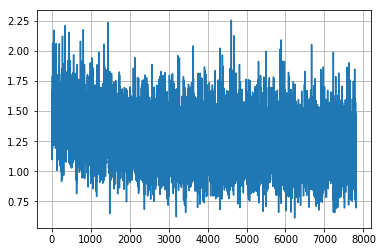

In [0]:
x = np.array(range(len(list_of_loses)))
plt.plot(x, list_of_loses)
plt.grid()
plt.show()

## normal learning rate = 0.001

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
list_of_loses = []
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        list_of_loses.append(loss.item())
        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 500 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0

print('Finished Training')

[1,   500] loss: 1.031
[1,  1000] loss: 0.999
[1,  1500] loss: 1.003
[2,   500] loss: 0.973
[2,  1000] loss: 0.973
[2,  1500] loss: 0.978
[3,   500] loss: 0.952
[3,  1000] loss: 0.961
[3,  1500] loss: 0.968
[4,   500] loss: 0.947
[4,  1000] loss: 0.961
[4,  1500] loss: 0.948
[5,   500] loss: 0.943
[5,  1000] loss: 0.947
[5,  1500] loss: 0.947
Finished Training


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 64 %


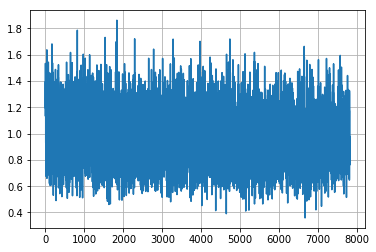

In [0]:
x = np.array(range(len(list_of_loses)))
plt.plot(x, list_of_loses)
plt.grid()
plt.show()

## low learning rate = 0.00001

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.00001, momentum=0.9)

In [0]:
list_of_loses = []
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        list_of_loses.append(loss.item())
        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 500 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0

print('Finished Training')

[1,   500] loss: 0.926
[1,  1000] loss: 0.914
[1,  1500] loss: 0.910
[2,   500] loss: 0.910
[2,  1000] loss: 0.920
[2,  1500] loss: 0.914
[3,   500] loss: 0.915
[3,  1000] loss: 0.912
[3,  1500] loss: 0.916
[4,   500] loss: 0.915
[4,  1000] loss: 0.903
[4,  1500] loss: 0.924
[5,   500] loss: 0.915
[5,  1000] loss: 0.911
[5,  1500] loss: 0.907
Finished Training


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 64 %


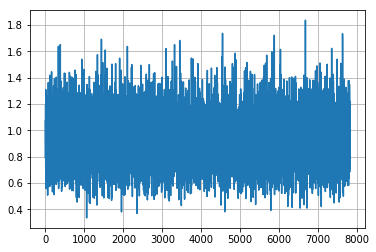

In [0]:
x = np.array(range(len(list_of_loses)))
plt.plot(x, list_of_loses)
plt.grid()
plt.show()

از مهم ترین نتایجی که میگیریم این است که مقدار زیاد لرنینگ ریت به هیچ وجه به نفع ما نیست و اگر آنرا زیاد کنیم به شدت ضرر میکنیم. اما با کم کردن آن، حال به مقدار یک صدم آن، تفاوت چندانی در دقت مشاهده نمیشود. 

نتیجه ی دیگری که میگیریم این است که با افزایش لرنینگ ریت، کم شدن خطا در طول زمان (افزایش داده تمرینی) بیشتر مشاهده میشود. یعنی برای کم شدن خطا در طی زیاد شدن داده های تمرینی، زیاد بودن لرنینگ ریت مناسب است 

# سوال پنجم

## batch size = 64

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 10)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.fc1(x)
        return x


net = Net()

In [0]:
torch.nn.init.xavier_uniform_(net.conv1.weight)
torch.nn.init.xavier_uniform_(net.conv2.weight)
torch.nn.init.xavier_uniform_(net.fc1.weight)

Parameter containing:
tensor([[-0.1060, -0.0719, -0.0082,  ..., -0.0568,  0.1013, -0.1180],
        [ 0.1178,  0.0429,  0.1091,  ..., -0.0614,  0.0645, -0.0240],
        [-0.0761,  0.0241,  0.0169,  ..., -0.0195,  0.0976, -0.0032],
        ...,
        [ 0.0225, -0.0467, -0.0065,  ..., -0.0659, -0.0819, -0.1079],
        [ 0.0681,  0.0150,  0.0377,  ..., -0.0289,  0.0047,  0.0638],
        [ 0.0801,  0.0348,  0.0057,  ...,  0.0548,  0.0634, -0.0787]],
       requires_grad=True)

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 500 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0

print('Finished Training')

[1,   500] loss: 2.172
[2,   500] loss: 1.777
[3,   500] loss: 1.604
[4,   500] loss: 1.513
[5,   500] loss: 1.455
Finished Training


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 48 %


## batch size = 256

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=256,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 10)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.fc1(x)
        return x


net = Net()

In [0]:
torch.nn.init.xavier_uniform_(net.conv1.weight)
torch.nn.init.xavier_uniform_(net.conv2.weight)
torch.nn.init.xavier_uniform_(net.fc1.weight)

Parameter containing:
tensor([[ 0.0933,  0.0970, -0.1011,  ..., -0.0822,  0.0487, -0.0441],
        [ 0.0493,  0.0942, -0.0766,  ...,  0.0957, -0.1071,  0.0864],
        [ 0.0043,  0.0052, -0.0085,  ...,  0.0818,  0.0033,  0.0902],
        ...,
        [ 0.0330, -0.0087, -0.0356,  ...,  0.0923, -0.0445,  0.0649],
        [-0.0432, -0.0146,  0.0526,  ..., -0.0928,  0.0341, -0.0349],
        [-0.0972,  0.0085, -0.0555,  ...,  0.0651,  0.0918,  0.1049]],
       requires_grad=True)

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 500 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0

print('Finished Training')

Finished Training


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 39 %


همانطور که مشاهده شد، با افزایش بچ سایز از ۳۲ به ۶۴ دقت ما از ۵۲ به 48 کاهش پیدا میکند و با کاهش آن از ۶۴ به ۲۵۶ ، دقت ما از 48 درصد به 39 درصد کاهش پیدا کرد. نتیجه ای که میگیریم این است که اگر بچ سایز را بدون دست زدن به لرنینگ ریت افزایش دهیم، دقت تخمین کاهش میابد
برتری ای که ما در افزایش بچ سایز به دست می آوریم، افزایش سرعت داده های تمرینی است.این نتیجه نیز قابل پیشبینی بود، زیرا دسته ها بزرگتر هستند و طبقه بندی بزرگتر سرعت ما را افزایش میدهد. 
(کاهش زمان از 116 به ۹۹ و به 84(
.

### increase learning rate 10 times

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [0]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 500 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0

print('Finished Training')

Finished Training


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


### decrease learning rate 10 times

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)

In [0]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 500 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0

print('Finished Training')

Finished Training


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 57 %


حال میبینیم که با دست زدن به لرنینگ ریت، دقت افزایش پیدا میکند. اما حال که بچ سایز را زیاد کرده ایم، با کاهش دادن لرنینگ ریت میتوانیم دقت بیشتری را منتظر باشیم تا با افزایش دادن آن. یعنی در نهایت کاهش لرنینگ ریت به نفع ما تمام میشود

# سوال ششم

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## tanh

In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 10)


    def forward(self, x):
        x = self.pool(F.tanh(self.conv1(x)))
        x = self.pool(F.tanh(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.fc1(x)
        return x


net = Net()

In [0]:
torch.nn.init.xavier_uniform_(net.conv1.weight)
torch.nn.init.xavier_uniform_(net.conv2.weight)
torch.nn.init.xavier_uniform_(net.fc1.weight)

Parameter containing:
tensor([[ 0.1107, -0.0714, -0.1042,  ..., -0.0766, -0.0651,  0.0210],
        [-0.0221, -0.0179, -0.0767,  ...,  0.0604,  0.0632, -0.1163],
        [-0.0414, -0.0500,  0.0972,  ...,  0.0260,  0.0399, -0.0242],
        ...,
        [-0.0506, -0.0493,  0.0938,  ...,  0.1044,  0.0803,  0.0249],
        [-0.0066, -0.0958,  0.0857,  ...,  0.0089,  0.0901,  0.0377],
        [-0.0873, -0.0466, -0.0707,  ...,  0.1186,  0.0371,  0.0703]],
       requires_grad=True)

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 500 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0

print('Finished Training')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


[1,   500] loss: 2.025
[1,  1000] loss: 1.785
[1,  1500] loss: 1.667
[2,   500] loss: 1.583
[2,  1000] loss: 1.556
[2,  1500] loss: 1.525
[3,   500] loss: 1.482
[3,  1000] loss: 1.458
[3,  1500] loss: 1.443
[4,   500] loss: 1.412
[4,  1000] loss: 1.393
[4,  1500] loss: 1.365
[5,   500] loss: 1.338
[5,  1000] loss: 1.345
[5,  1500] loss: 1.312
Finished Training


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Accuracy of the network on the 10000 test images: 53 %


## leaky_relu

In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 10)


    def forward(self, x):
        x = self.pool(F.leaky_relu(self.conv1(x)))
        x = self.pool(F.leaky_relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.fc1(x)
        return x


net = Net()

In [0]:
torch.nn.init.xavier_uniform_(net.conv1.weight)
torch.nn.init.xavier_uniform_(net.conv2.weight)
torch.nn.init.xavier_uniform_(net.fc1.weight)

Parameter containing:
tensor([[ 0.0805, -0.0810, -0.0173,  ...,  0.1023,  0.0349, -0.0632],
        [ 0.0229,  0.0931,  0.1203,  ..., -0.0494, -0.0457,  0.0419],
        [-0.1096,  0.0349,  0.0723,  ...,  0.0334, -0.0676,  0.1099],
        ...,
        [-0.0835, -0.0559,  0.0663,  ...,  0.0492, -0.0718,  0.0110],
        [ 0.0240,  0.0574,  0.0913,  ..., -0.0146,  0.0799, -0.1026],
        [-0.0024, -0.0019,  0.0739,  ..., -0.0717, -0.0264, -0.0098]],
       requires_grad=True)

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 500 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0

print('Finished Training')

[1,   500] loss: 2.093
[1,  1000] loss: 1.820
[1,  1500] loss: 1.669
[2,   500] loss: 1.572
[2,  1000] loss: 1.525
[2,  1500] loss: 1.496
[3,   500] loss: 1.457
[3,  1000] loss: 1.420
[3,  1500] loss: 1.411
[4,   500] loss: 1.369
[4,  1000] loss: 1.355
[4,  1500] loss: 1.349
[5,   500] loss: 1.308
[5,  1000] loss: 1.305
[5,  1500] loss: 1.284
Finished Training


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


## softplus

In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 10)


    def forward(self, x):
        x = self.pool(F.softplus(self.conv1(x)))
        x = self.pool(F.softplus(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.fc1(x)
        return x


net = Net()

In [0]:
torch.nn.init.xavier_uniform_(net.conv1.weight)
torch.nn.init.xavier_uniform_(net.conv2.weight)
torch.nn.init.xavier_uniform_(net.fc1.weight)

Parameter containing:
tensor([[-0.1157,  0.1070,  0.0532,  ..., -0.0891,  0.0280, -0.0180],
        [ 0.0673, -0.0411, -0.0520,  ...,  0.1020,  0.0199,  0.0419],
        [ 0.0690, -0.1033, -0.0422,  ...,  0.0076,  0.0164,  0.0672],
        ...,
        [ 0.0345,  0.1185,  0.0309,  ...,  0.1028, -0.0532,  0.0448],
        [ 0.1169,  0.0087, -0.0560,  ...,  0.0066, -0.0228,  0.0910],
        [-0.0041, -0.1093,  0.0452,  ..., -0.0262, -0.0504,  0.0995]],
       requires_grad=True)

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 500 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0

print('Finished Training')

[1,   500] loss: 2.285
[1,  1000] loss: 2.078
[1,  1500] loss: 1.917
[2,   500] loss: 1.789
[2,  1000] loss: 1.719
[2,  1500] loss: 1.670
[3,   500] loss: 1.612
[3,  1000] loss: 1.591
[3,  1500] loss: 1.559
[4,   500] loss: 1.529
[4,  1000] loss: 1.515
[4,  1500] loss: 1.500
[5,   500] loss: 1.464
[5,  1000] loss: 1.460
[5,  1500] loss: 1.441
Finished Training


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 48 %


نتیجه میگیریم که بهترین 
activation function
از بین توابع گفته شده
relu
و 
leaku_relu
هستند

# سوال هفتم

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 10)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.fc1(x)
        return x


net = Net()

In [0]:
torch.nn.init.xavier_uniform_(net.conv1.weight)
torch.nn.init.xavier_uniform_(net.conv2.weight)
torch.nn.init.xavier_uniform_(net.fc1.weight)

Parameter containing:
tensor([[ 0.1055,  0.0954, -0.1014,  ..., -0.0333, -0.0583, -0.0636],
        [ 0.0893,  0.0664,  0.1071,  ..., -0.0970,  0.0084,  0.0734],
        [ 0.1165, -0.0450,  0.0469,  ..., -0.1168,  0.1153,  0.0772],
        ...,
        [ 0.0491, -0.1197, -0.0008,  ..., -0.0997, -0.0728, -0.0473],
        [-0.0222, -0.0512, -0.0329,  ..., -0.0636, -0.0025, -0.0587],
        [ 0.1205, -0.0201, -0.0874,  ..., -0.0212, -0.0204,  0.0528]],
       requires_grad=True)

## with momentum

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 500 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0

print('Finished Training')

[1,   500] loss: 2.063
[1,  1000] loss: 1.823
[1,  1500] loss: 1.708
[2,   500] loss: 1.624
[2,  1000] loss: 1.561
[2,  1500] loss: 1.527
[3,   500] loss: 1.464
[3,  1000] loss: 1.464
[3,  1500] loss: 1.433
[4,   500] loss: 1.383
[4,  1000] loss: 1.380
[4,  1500] loss: 1.357
[5,   500] loss: 1.323
[5,  1000] loss: 1.303
[5,  1500] loss: 1.294
Finished Training


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


## without momentum

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

In [0]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 500 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0

print('Finished Training')

[1,   500] loss: 2.297
[1,  1000] loss: 2.258
[1,  1500] loss: 2.216
[2,   500] loss: 2.141
[2,  1000] loss: 2.072
[2,  1500] loss: 2.013
[3,   500] loss: 1.970
[3,  1000] loss: 1.960
[3,  1500] loss: 1.917
[4,   500] loss: 1.902
[4,  1000] loss: 1.860
[4,  1500] loss: 1.854
[5,   500] loss: 1.825
[5,  1000] loss: 1.783
[5,  1500] loss: 1.791
Finished Training


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 37 %


مشاهده شد که از لحاظ زمانی تفاوت خاصی بین دو حالت گفته شده وجود ندارد.
اما تفاوت اصلی در دقت تخمین است که حالت با استفاده از مومنتوم بسیار بهتر است.

علت به این گونه است:
وقتی که داریم محاسبه میکنیم، در بخشی از کارمان، دقت به گونه ای است که در یک 
local minima 
گیر کرده ایم و فک میکنیم که به حالت ایده آل رسیده ایم
اگر این مشکل برای ما ایجاد شد، با وجود موممنتوم های زیاد میتوانیم از این لوکال مینیما ها خارج شویم
طبیعی است که اگر اندازه ی مومنتوم بیش از حد زیاد باشد، تلاش بیش از حد زیادی برای خروج از لوکال مینیما انجام میشود که الزاما خوب نیست.
به عکس های درون لینک زیر میتوان دقت کرد
https://www.quora.com/What-does-momentum-mean-in-neural-networks
